# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

# Study data files
mouse_metadata_to_load = Path("data/Mouse_metadata.csv")
study_results_to_load = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_to_load)
study_results = pd.read_csv(study_results_to_load)

# Combine the data into a single DataFrame
scc_data_complete_df = pd.merge(mouse_metadata, study_results, how="left", on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
scc_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [72]:
# Check the number of mice.
total_unique_mice = scc_data_complete_df['Mouse ID'].nunique()
print(f'Total number of unique mice:{total_unique_mice}')

Total number of unique mice:249


In [73]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicates = scc_data_complete_df.duplicated(subset=['Mouse ID', 'Timepoint'])

# Print the duplicate records
print("Duplicate records:")
print(scc_data_complete_df[duplicates])

Duplicate records:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909               45.00                 0  
911               47.57                 0  
913               49.88                 0  
915               53.44                 0  
917               54.66                 1  


In [74]:
# Filter out records with Mouse ID 'g989'
filtered_df = scc_data_complete_df[scc_data_complete_df['Mouse ID'] != 'g989']

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicates = filtered_df.duplicated(subset=['Mouse ID', 'Timepoint'])

# Use .loc to select the rows that are not duplicates
clean_df = filtered_df.loc[~duplicates]

In [75]:
# Check the unique values of 'Mouse ID' in the cleaned DataFrame
unique_mice = clean_df['Mouse ID'].nunique()
print("Total unique mice after removing duplicates:", unique_mice)

Total unique mice after removing duplicates: 248


## Summary Statistics

In [76]:
# Rename the columns
scc_data_complete_df = scc_data_complete_df.rename(columns={'Drug Regimen': 'Drug_Regimen', 'Tumor Volume (mm3)': 'Tumor_Volume_mm3'})

# Define the list of summary statistics functions
summary_stats = ['mean', 'median', 'var', 'std', 'sem']

# Aggregate the data using the list of summary statistics functions
summary = scc_data_complete_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].agg(summary_stats)

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame(summary)

# Display the DataFrame
summary_df

,mean,median,var,std,sem
Drug_Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Rows'>

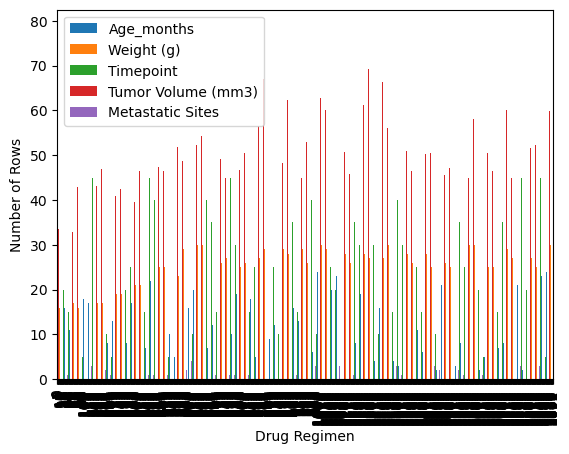

In [77]:
# Group the data by Drug regiment and count the number of rows for each drug.
drug_regimen_counts = clean_df.groupby('Drug Regimen').size()

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df.plot(kind='bar', xlabel= 'Drug Regimen', ylabel='Number of Rows')

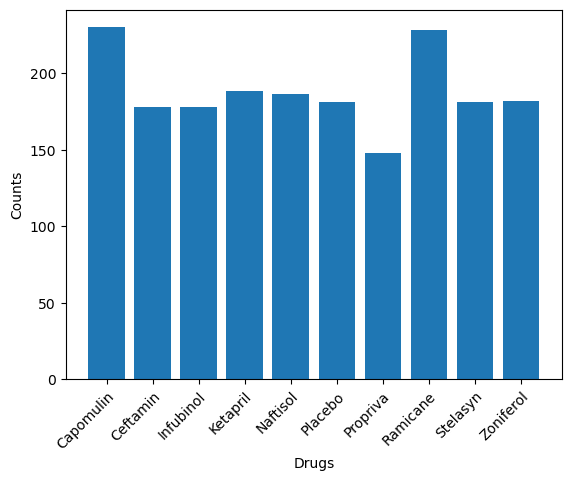

In [89]:
# Group the data by Drug regiment and count the number of rows for each drug.
drug_regimen_counts = clean_df.groupby('Drug Regimen').size()

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Drug Names = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
drugs = drug_regimen_counts.index
plt.bar(drugs, drug_regimen_counts)
plt.xlabel('Drugs')
plt.ylabel('Counts')

# Format labels
plt.xticks(rotation=45, ha='right', wrap=True)
plt.show()

<Axes: ylabel='Sex'>

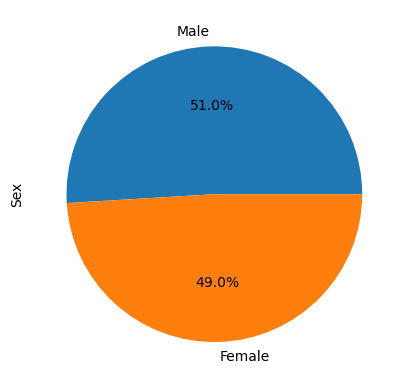

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df['Sex'].value_counts()
sex_counts.plot(kind= 'pie', labels=['Male', 'Female'], autopct='%1.1f%%', ylabel = 'Sex')

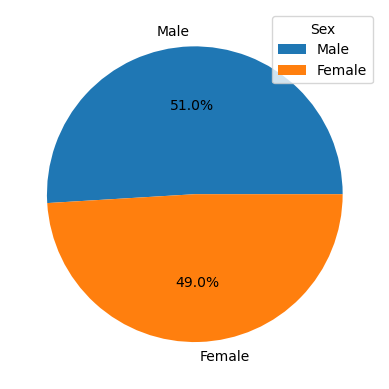

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_df['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.legend(title='Sex', labels=sex_counts.index, loc='upper right')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


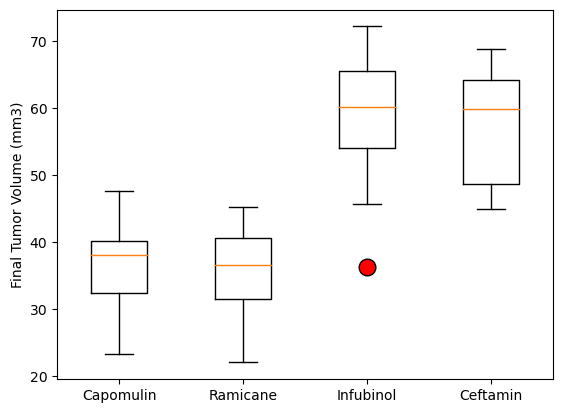

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

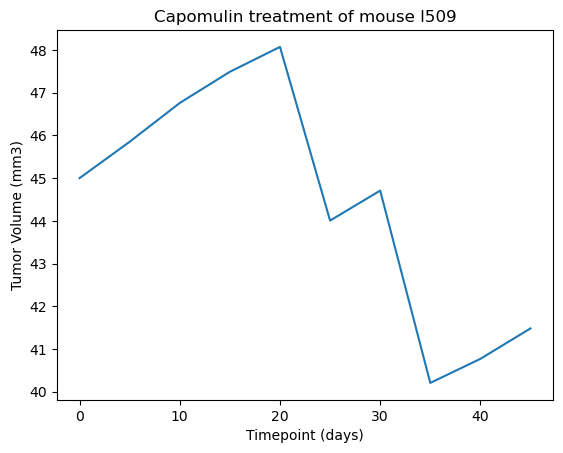

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


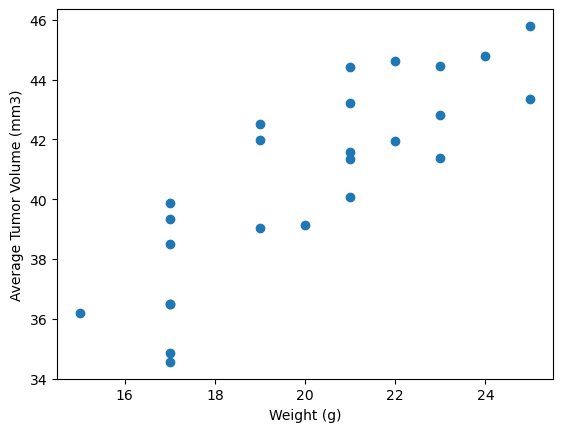

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


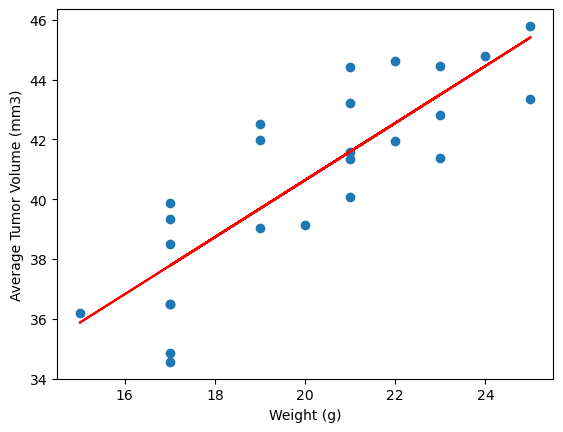

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
